In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
Dots = pd.read_csv('Data_Level4_UMDOTS_CampusTrafficCount.csv')

In [4]:
Dots.sample(5)

,time,pedestrians,bicyclists,cars,buses,trucks,location
3126,2019-11-01T11:30:00-04:00,71,5,202,4,12,Paint_Branch_Dr_At_Campus_Dr
5432,2019-10-28T10:00:00-04:00,104,10,44,1,4,Regents_Dr_&_Stadium_Dr_2
13284,2019-11-09T00:00:00-04:00,0,0,0,0,0,University_Blvd_&_Paint_Branch_Dr
3240,2019-11-02T16:00:00-04:00,68,1,260,12,9,Paint_Branch_Dr_At_Campus_Dr
4507,2019-11-01T19:45:00-04:00,29,0,151,6,4,Regents_Dr_&_Stadium_Dr_1


![title](dots_sensor.jpg)

![title](map.jpg)

In [5]:
Dots['Date'] = Dots['time'].str[:10]
Dots['Date'] = pd.to_datetime(Dots['Date'])
#pd.to_datetime(Dots['Date'], format='%Y%m%d')

In [6]:
Dots['time'] = pd.to_datetime(Dots['time'].str[:10]+' '+Dots['time'].str[11:19])

In [7]:
Dots['StartTime'] = Dots['time'].apply(lambda x: x.time())

In [8]:
Dots['location'].value_counts()

Regents_Dr_&_Stadium_Dr_1            1348
Regents_Dr_&_Stadium_Dr_3            1348
South_Gate_Northern_View             1348
Paint_Branch_Dr_At_Campus_Dr         1348
Campus_Dr_&_Presidential_Ave         1348
University_Blvd_&_Paint_Branch_Dr    1348
Stadium_Dr_East_Of_Regents_Dr        1348
Campus_Dr_At_Paint_Branch_Dr         1348
South_Gate_South_View                1348
Regents_Dr_&_Stadium_Dr_2            1348
Name: location, dtype: int64

In [9]:
def loca_into_five(a):
    if 'Gate' in a:
        return "Baltimore Avenue & Regents Drive (South Gate)"
    elif ('Campus' in a) & ('Paint' in a):
        return "Campus Drive & Paint Branch Drive"
    elif ('Regents' in a) & ('Stadium' in a):
        return "Stadium Drive & Regents Drive"
    else:
        return a

In [10]:
Dots['location_5'] = Dots['location'].apply(loca_into_five)

In [11]:
Dots['weekday'] = Dots['Date'].apply(lambda x: x.weekday()+1)

In [12]:
Dots.head(5)

,time,pedestrians,bicyclists,cars,buses,trucks,location,Date,StartTime,location_5,weekday
0,2019-10-28 00:00:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,00:00:00,Campus_Dr_&_Presidential_Ave,1
1,2019-10-28 00:15:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,00:15:00,Campus_Dr_&_Presidential_Ave,1
2,2019-10-28 00:30:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,00:30:00,Campus_Dr_&_Presidential_Ave,1
3,2019-10-28 00:45:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,00:45:00,Campus_Dr_&_Presidential_Ave,1
4,2019-10-28 01:00:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,01:00:00,Campus_Dr_&_Presidential_Ave,1


In [12]:
Dots['location_5'].value_counts()

Stadium Drive & Regents Drive                    5392
Campus Drive & Paint Branch Drive                2696
Baltimore Avenue & Regents Drive (South Gate)    2696
University_Blvd_&_Paint_Branch_Dr                1348
Campus_Dr_&_Presidential_Ave                     1348
Name: location_5, dtype: int64

In [13]:
Dots[Dots['location_5']=='Stadium Drive & Regents Drive'].groupby(['location'])['cars'].sum()

location
Regents_Dr_&_Stadium_Dr_1        131479
Regents_Dr_&_Stadium_Dr_2         57442
Regents_Dr_&_Stadium_Dr_3        160355
Stadium_Dr_East_Of_Regents_Dr     57256
Name: cars, dtype: int64

#### deal with double-count problem

For locations have at least 2 sensors, we divide the number by 2 considering double count problem

In [13]:
Dots_sensor_1=Dots[Dots['location_5']=='Campus Drive & Paint Branch Drive']
Dots_sensor_other=Dots[Dots['location_5']!='Campus Drive & Paint Branch Drive']
Dots_sensor_2=Dots[Dots['location_5']=='Stadium Drive & Regents Drive']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Stadium Drive & Regents Drive']
Dots_sensor_3=Dots[Dots['location_5']=='Baltimore Avenue & Regents Drive (South Gate)']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Baltimore Avenue & Regents Drive (South Gate)']

Dots_sensor_1=Dots_sensor_1.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_2=Dots_sensor_2.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_3=Dots_sensor_3.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_other=Dots_sensor_other.drop(columns=['location'])

for i in ['pedestrians','bicyclists','cars','buses','trucks']:
    Dots_sensor_2[i]=Dots_sensor_2[i]*2

Dots_loc5=Dots_sensor_1.append([Dots_sensor_2,Dots_sensor_3,Dots_sensor_other],ignore_index=False)

/Users/jingsixu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [14]:
Dots_loc5.sample(5)

,Date,StartTime,bicyclists,buses,cars,location_5,pedestrians,time,trucks,weekday
12975,2019-11-05,18:45:00,2.0,0.0,63.0,University_Blvd_&_Paint_Branch_Dr,0.0,2019-11-05 18:45:00,2.0,2.0
92,2019-10-28,23:00:00,0.0,3.5,69.5,Campus Drive & Paint Branch Drive,1.5,2019-10-28 23:00:00,1.5,1.0
936,2019-11-06,18:00:00,219.0,26.5,362.0,Stadium Drive & Regents Drive,497.5,2019-11-06 18:00:00,18.5,3.0
12742,2019-11-03,08:30:00,0.0,0.0,4.0,University_Blvd_&_Paint_Branch_Dr,0.0,2019-11-03 08:30:00,0.0,7.0
856,2019-11-05,22:00:00,0.0,0.0,0.0,Campus_Dr_&_Presidential_Ave,0.0,2019-11-05 22:00:00,0.0,2.0


In [16]:
Dots_loc5.to_csv('Dots_loc5.csv')

### have a look at overall time trend of traffic by each mode

In [19]:
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

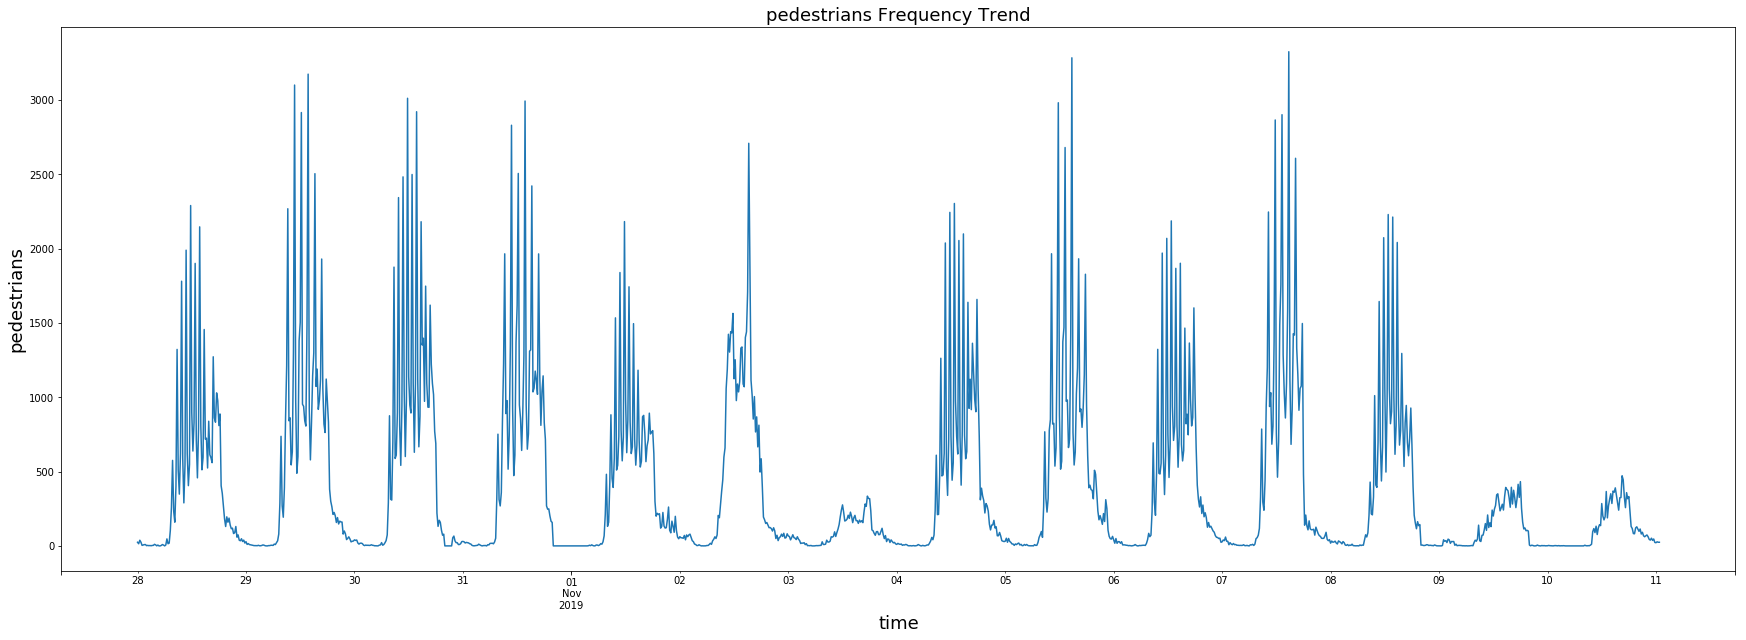

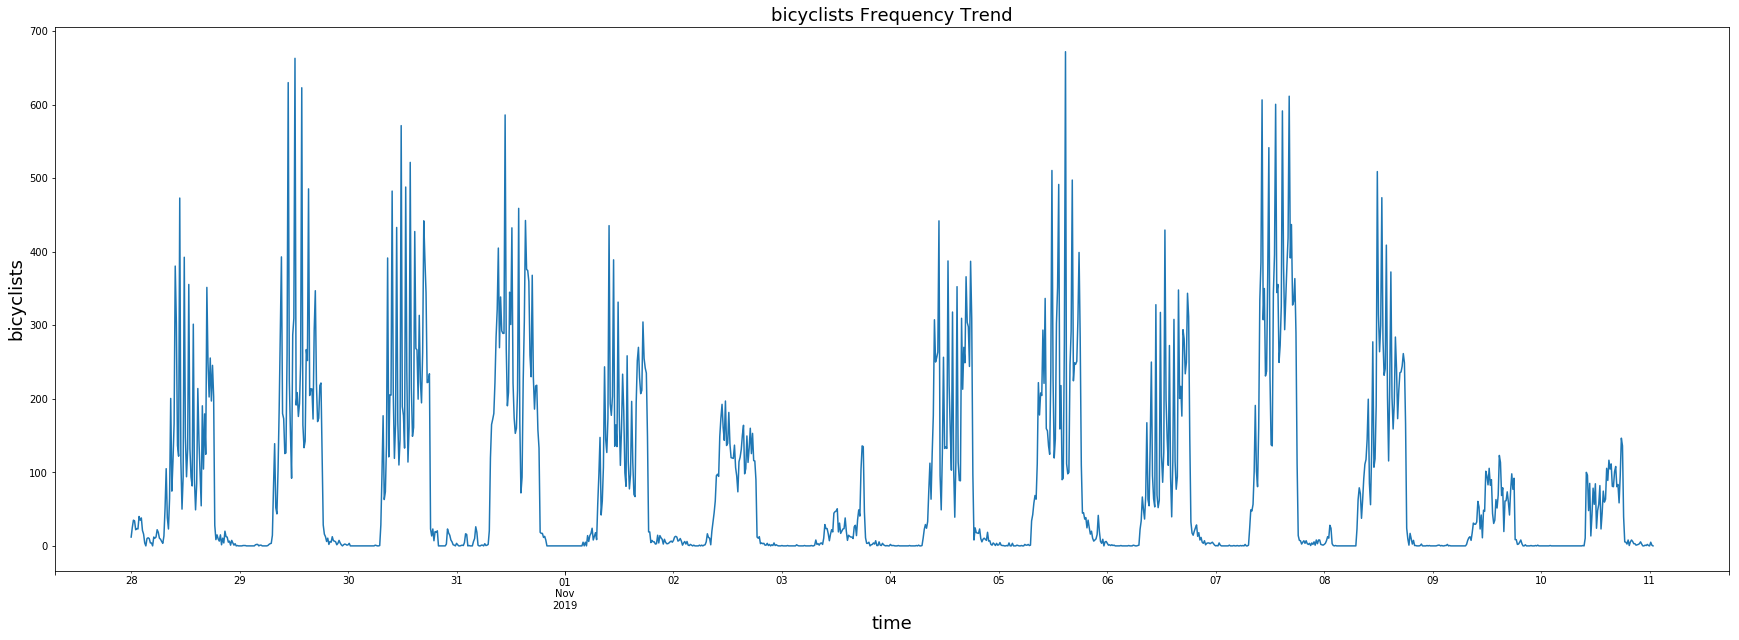

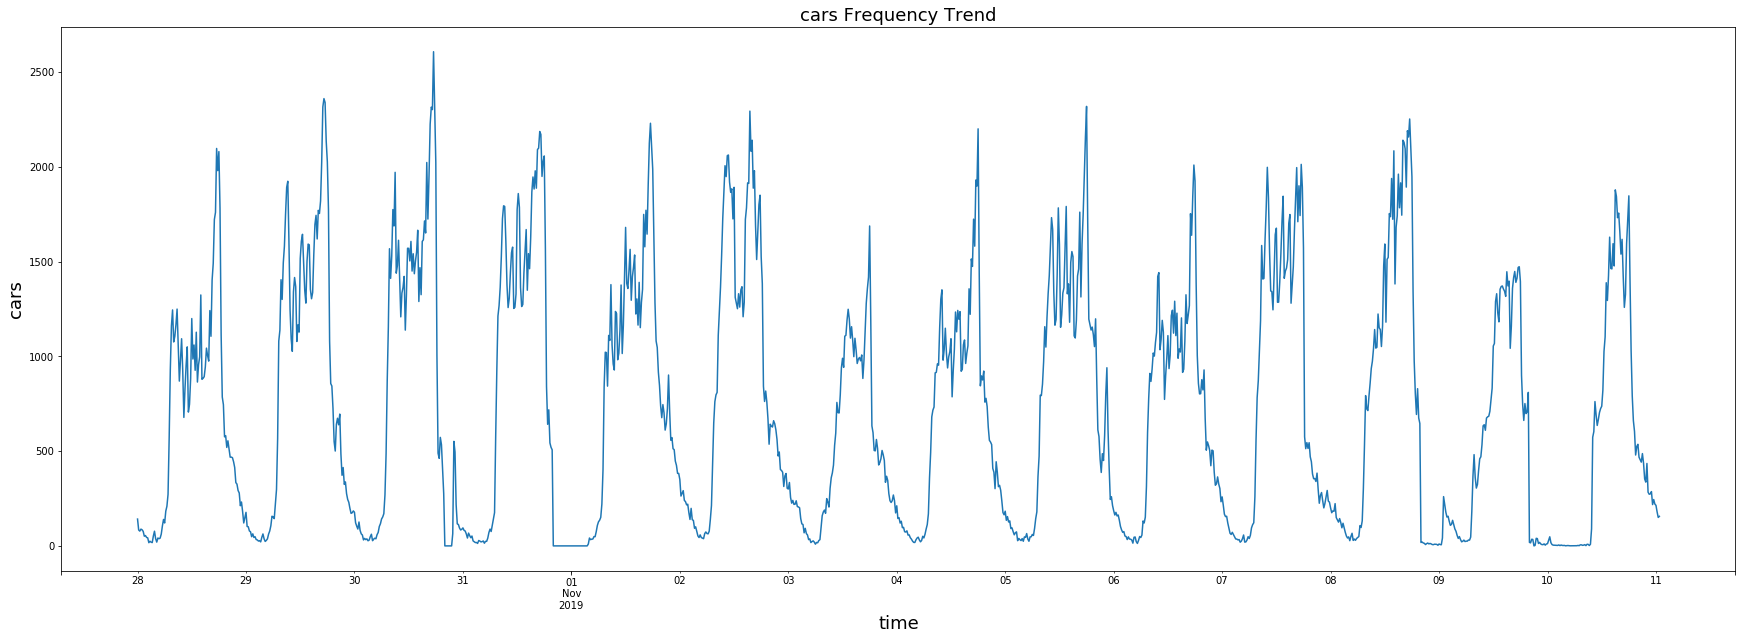

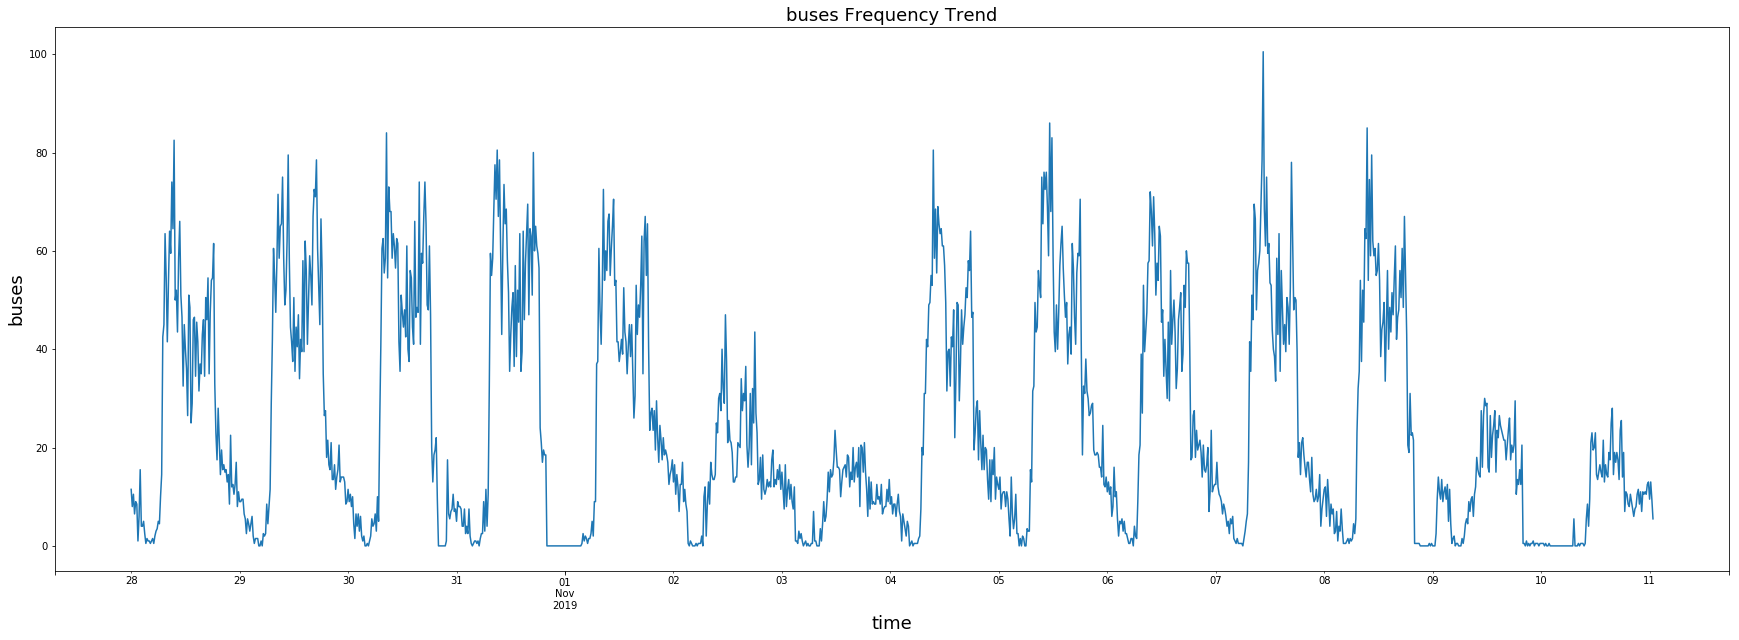

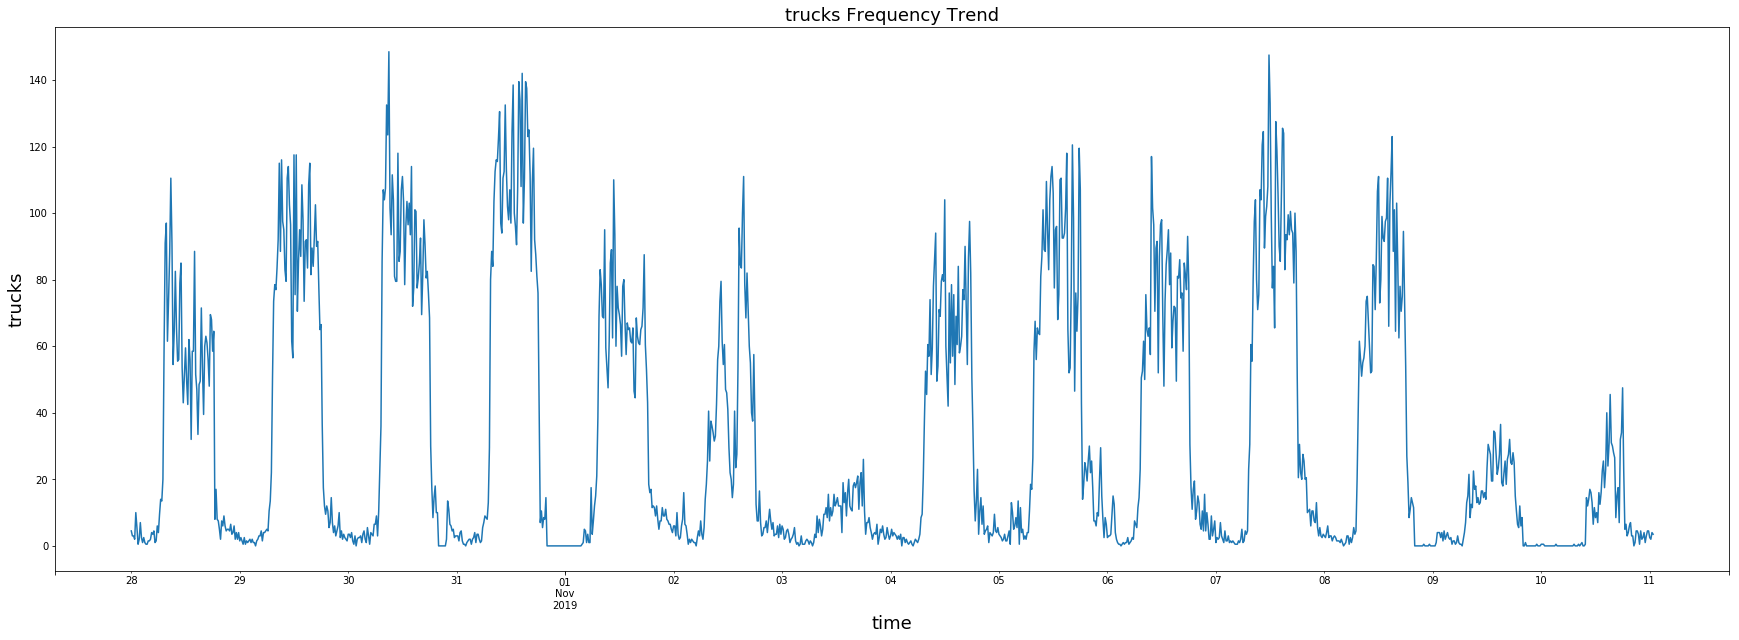

In [20]:
plt.figure(figsize=(8,30))
c = ['steelblue','darkorange','green','firebrick','darkorchid']
for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    Dots_loc5.groupby(['time'])[types].sum().plot(kind= 'line',x ='time', y=types, figsize = (30,10))

    plt.xlabel('time', fontsize =18)
    plt.ylabel(types,fontsize =18)
    plt.title(types + ' Frequency Trend',fontsize =18, color = "k")
    plt.savefig("figs/" + types +".png",dpi=100) 
    plt.show()


<b>Discription of time trend</b> Pedestrans, bicyclists, buses, and trucks have clearly pattern. The frequency is high during weekdays and less during weekends. Pedestrians have the most differences. These two modes are basically main ways to commute inside the campus.
Time trend of cars is pretty flat over week, slightly less on weekends.

<b>Findings:</b> on the game day, which is first Saturday, more trucks and more pedestrians than another Saturday.

#### Pedestrians num during one single day 10-28-2010

(array([26203680, 26203725, 26203770, 26203815, 26203860, 26203905,
        26203950, 26203995, 26204040, 26204085, 26204130, 26204175,
        26204220, 26204265, 26204310, 26204355, 26204400, 26204445,
        26204490, 26204535, 26204580, 26204625, 26204670, 26204715,
        26204760, 26204805, 26204850, 26204895, 26204940, 26204985,
        26205030, 26205075, 26203680, 26203725, 26203770, 26203815,
        26203860, 26203905, 26203950, 26203995, 26204040, 26204085,
        26204130, 26204175, 26204220, 26204265, 26204310, 26204355,
        26204400, 26204445, 26204490, 26204535, 26204580, 26204625,
        26204670, 26204715, 26204760, 26204805, 26204850, 26204895,
        26204940, 26204985, 26205030, 26205075, 26203680, 26203725,
        26203770, 26203815, 26203860, 26203905, 26203950, 26203995,
        26204040, 26204085, 26204130, 26204175, 26204220, 26204265,
        26204310, 26204355, 26204400, 26204445, 26204490, 26204535,
        26204580, 26204625, 26204670, 26204715, 

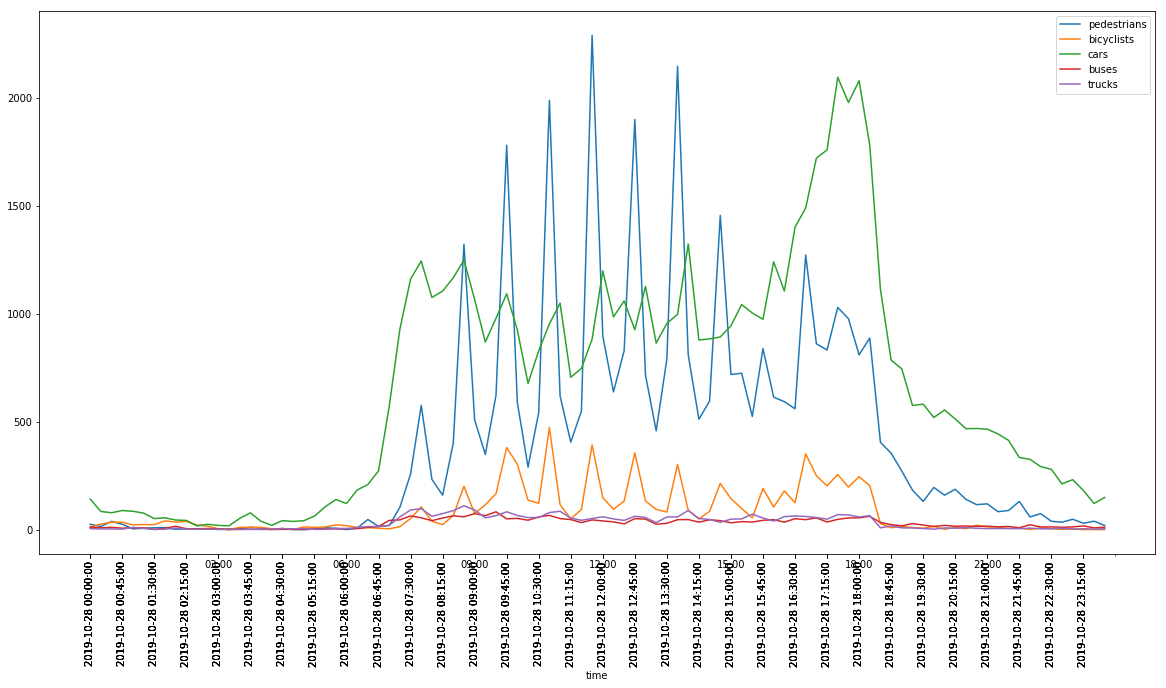

In [18]:
Dots_loc5_M = Dots_loc5[Dots_loc5['Date']=='2019-10-28']
Dots_loc5_M.groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(figsize=(20,10))
plt.xticks(list(Dots_loc5_M.time)[::3], Dots_loc5_M.time[::3])
plt.xticks(rotation = 90)

In [54]:
Dots_loc5_M[['pedestrians','time']]

,pedestrians,time
0,1.5,2019-10-28 00:00:00
1,3.0,2019-10-28 00:15:00
2,0.0,2019-10-28 00:30:00
3,0.5,2019-10-28 00:45:00
4,0.0,2019-10-28 01:00:00
5,0.0,2019-10-28 01:15:00
6,0.0,2019-10-28 01:30:00
7,1.5,2019-10-28 01:45:00
8,0.0,2019-10-28 02:00:00
9,0.0,2019-10-28 02:15:00


pedestrians walk out after 7am, have peak every one and a half hour, and decline dramaticaly after 3pm.

(array([26205120, 26205165, 26205210, 26205255, 26205300, 26205345,
        26205390, 26205435, 26205480, 26205525, 26205570, 26205615,
        26205660, 26205705, 26205750, 26205795, 26205840, 26205885,
        26205930, 26205975, 26206020, 26206065, 26206110, 26206155,
        26206200, 26206245, 26206290, 26206335, 26206380, 26206425,
        26206470, 26206515, 26205120, 26205165, 26205210, 26205255,
        26205300, 26205345, 26205390, 26205435, 26205480, 26205525,
        26205570, 26205615, 26205660, 26205705, 26205750, 26205795,
        26205840, 26205885, 26205930, 26205975, 26206020, 26206065,
        26206110, 26206155, 26206200, 26206245, 26206290, 26206335,
        26206380, 26206425, 26206470, 26206515, 26205120, 26205165,
        26205210, 26205255, 26205300, 26205345, 26205390, 26205435,
        26205480, 26205525, 26205570, 26205615, 26205660, 26205705,
        26205750, 26205795, 26205840, 26205885, 26205930, 26205975,
        26206020, 26206065, 26206110, 26206155, 

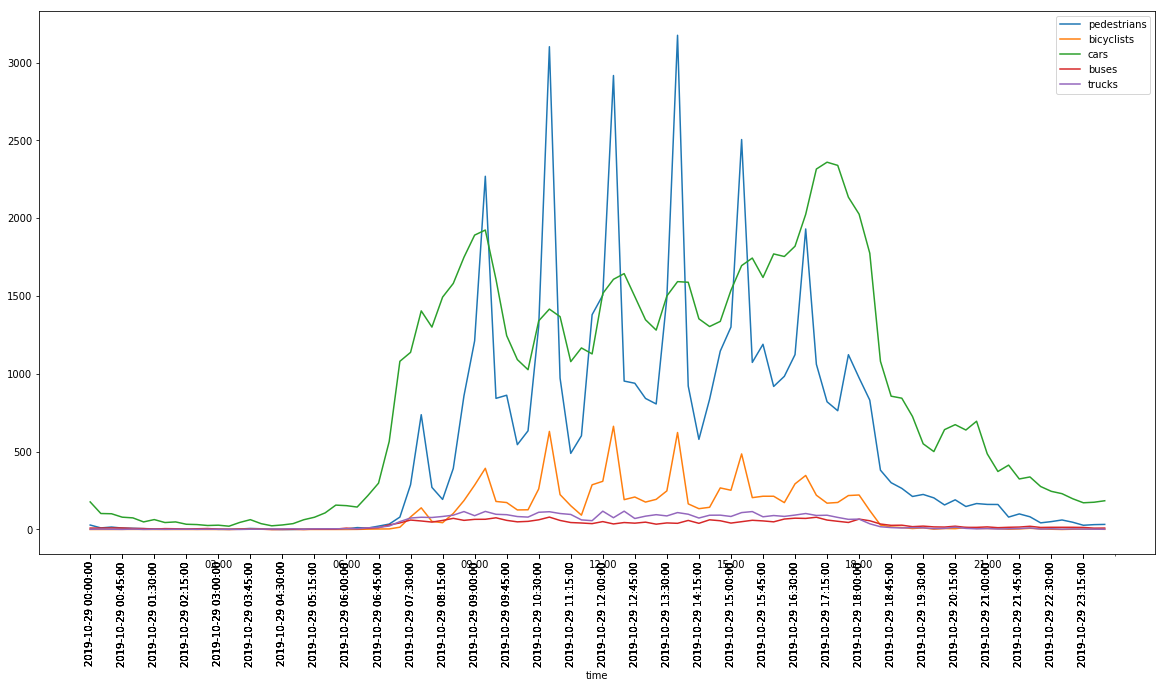

In [53]:
Dots_loc5_W = Dots_loc5[Dots_loc5['Date']=='2019-10-29']
Dots_loc5_W.groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(figsize=(20,10))
plt.xticks(list(Dots_loc5_W.time)[::3], Dots_loc5_W.time[::3])
plt.xticks(rotation = 90)

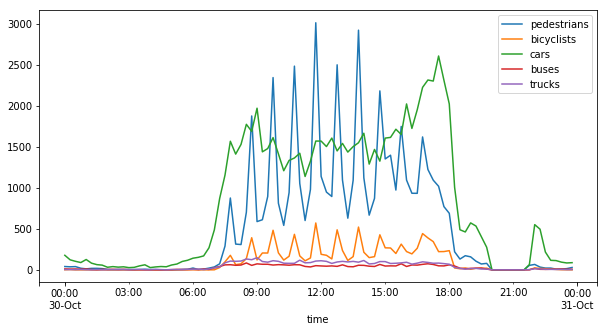

In [47]:
Dots_loc5[Dots_loc5['Date']=='2019-10-30'].groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(figsize=(10,5))

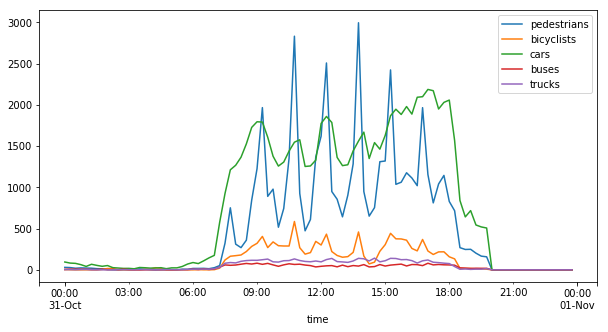

In [48]:
Dots_loc5[Dots_loc5['Date']=='2019-10-31'].groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(figsize=(10,5))

A good proof of bus efficiency is bus reach peak at the same time with pedestrians

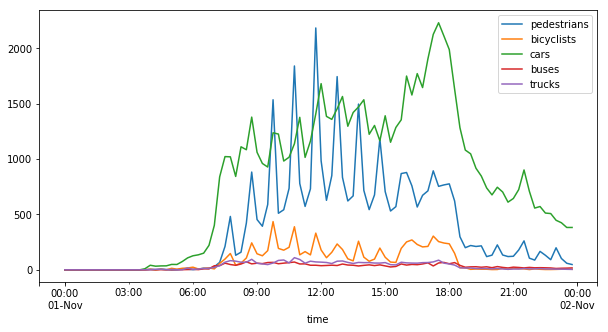

In [49]:
Dots_loc5[Dots_loc5['Date']=='2019-11-01'].groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(figsize=(10,5))

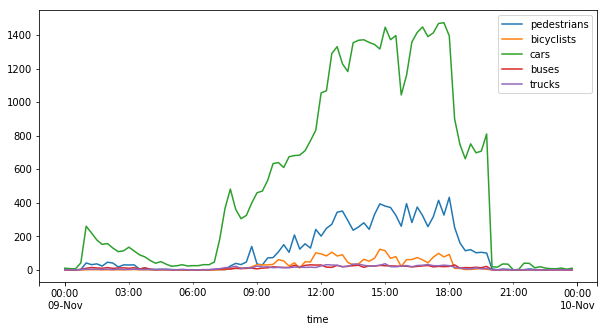

In [38]:
Dots_loc5[Dots_loc5['Date']=='2019-11-09'].groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(figsize=(10,5))

### Here, look at population of different modes by 5 locations. 

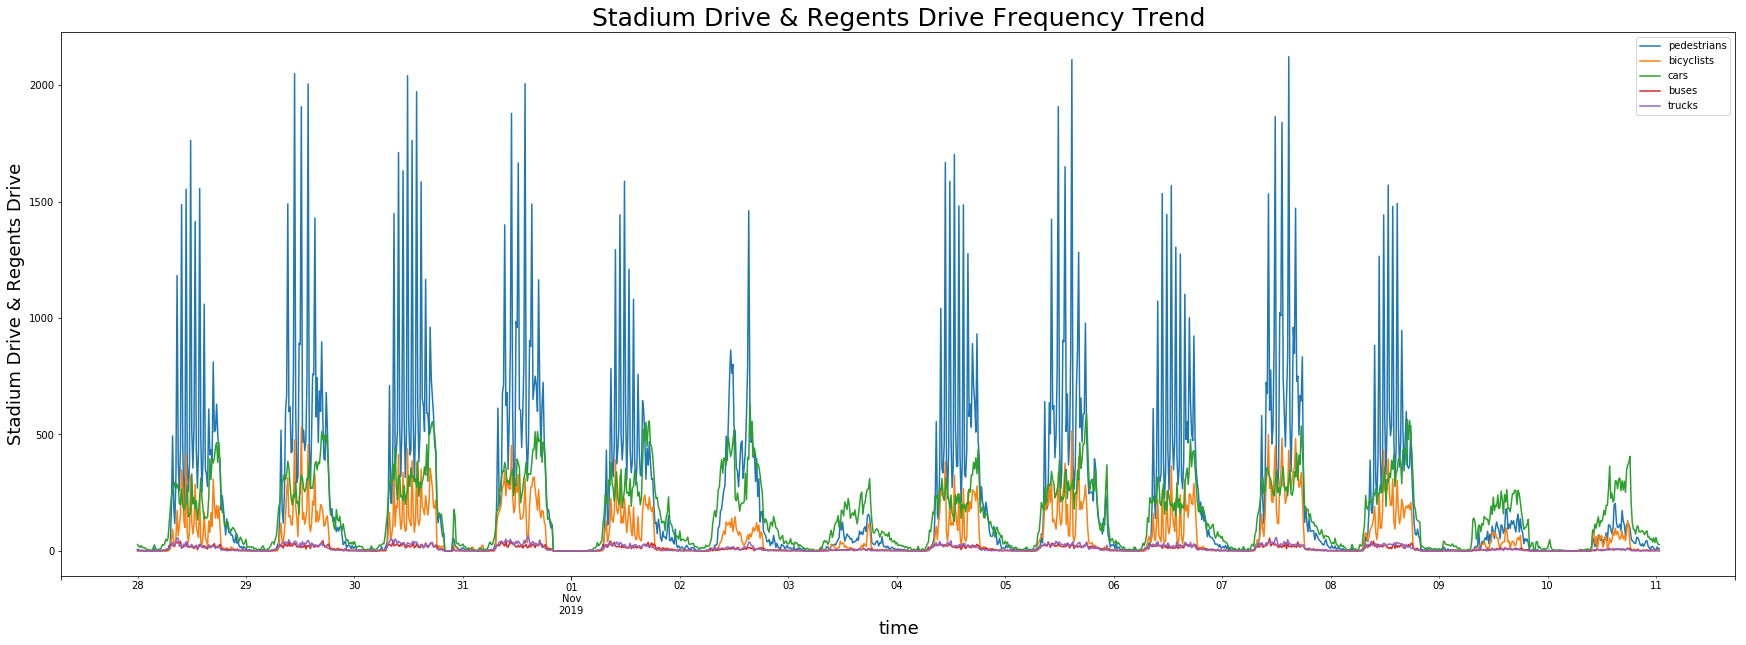

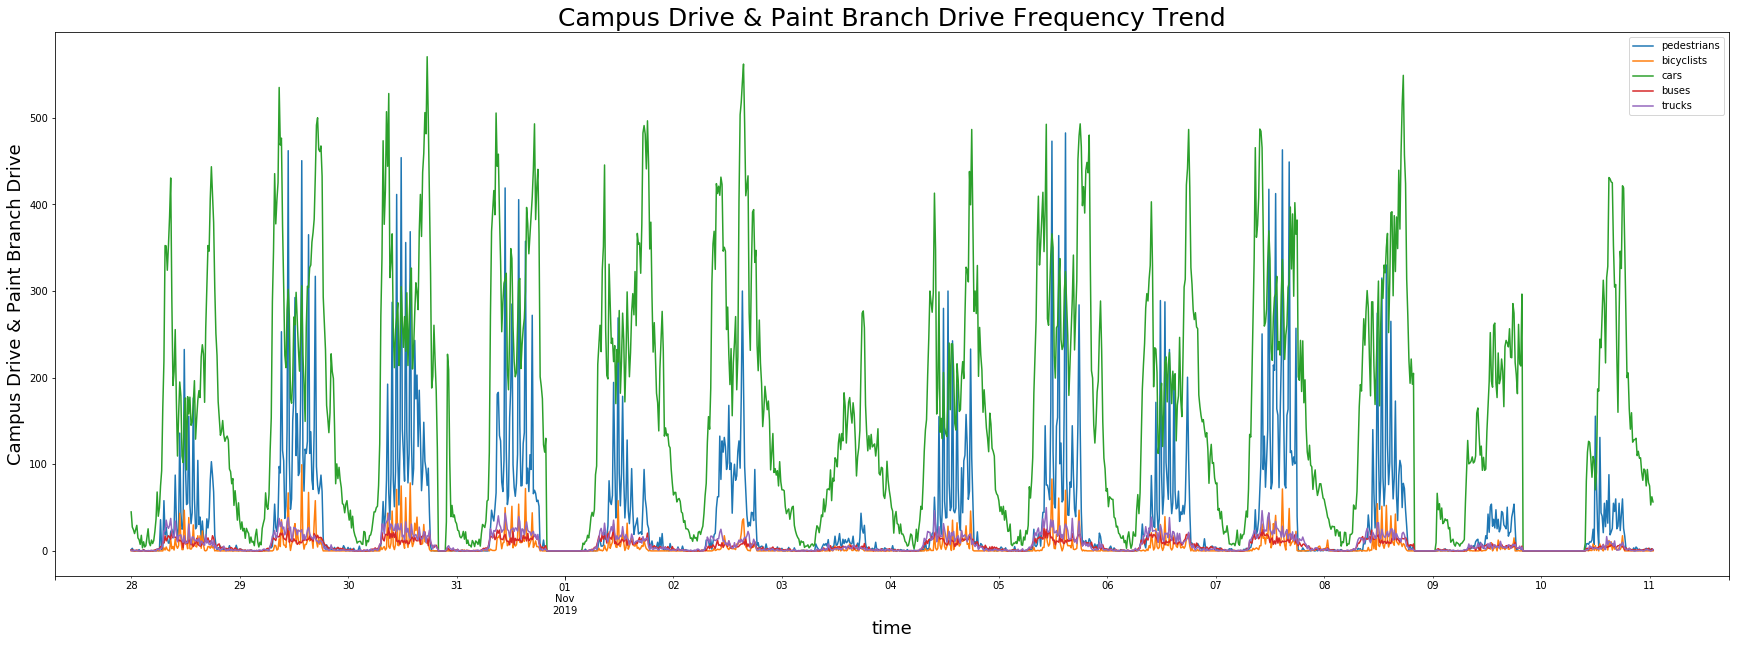

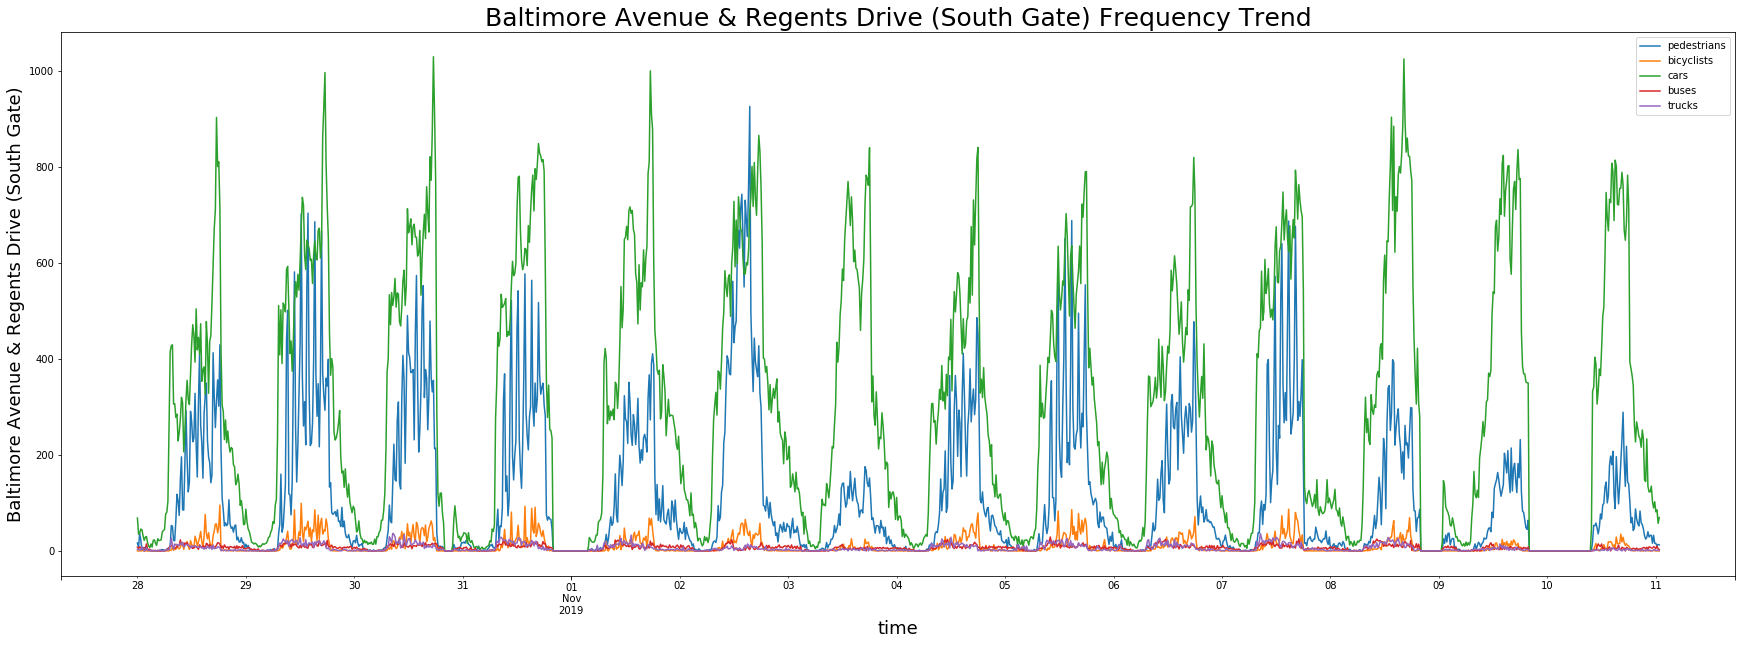

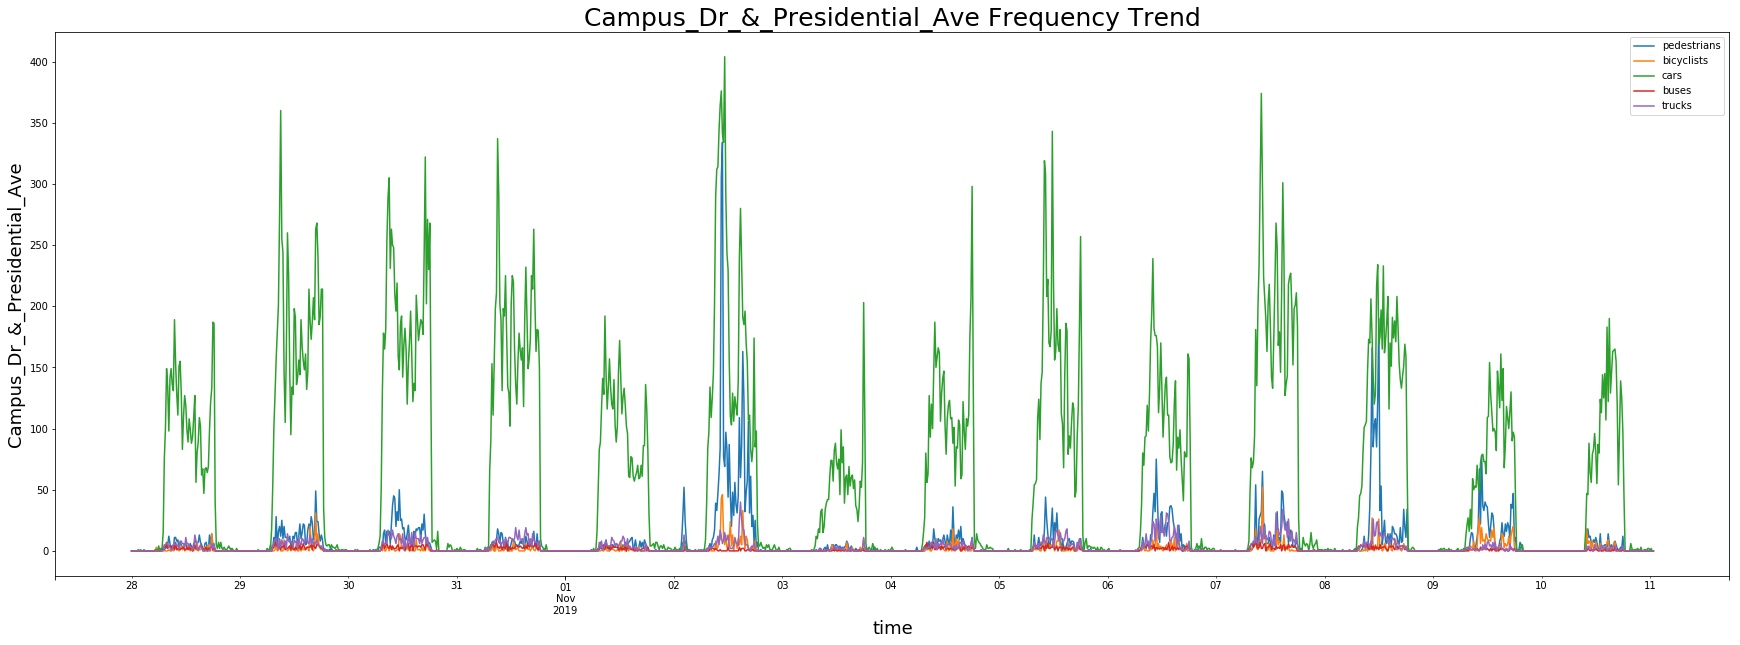

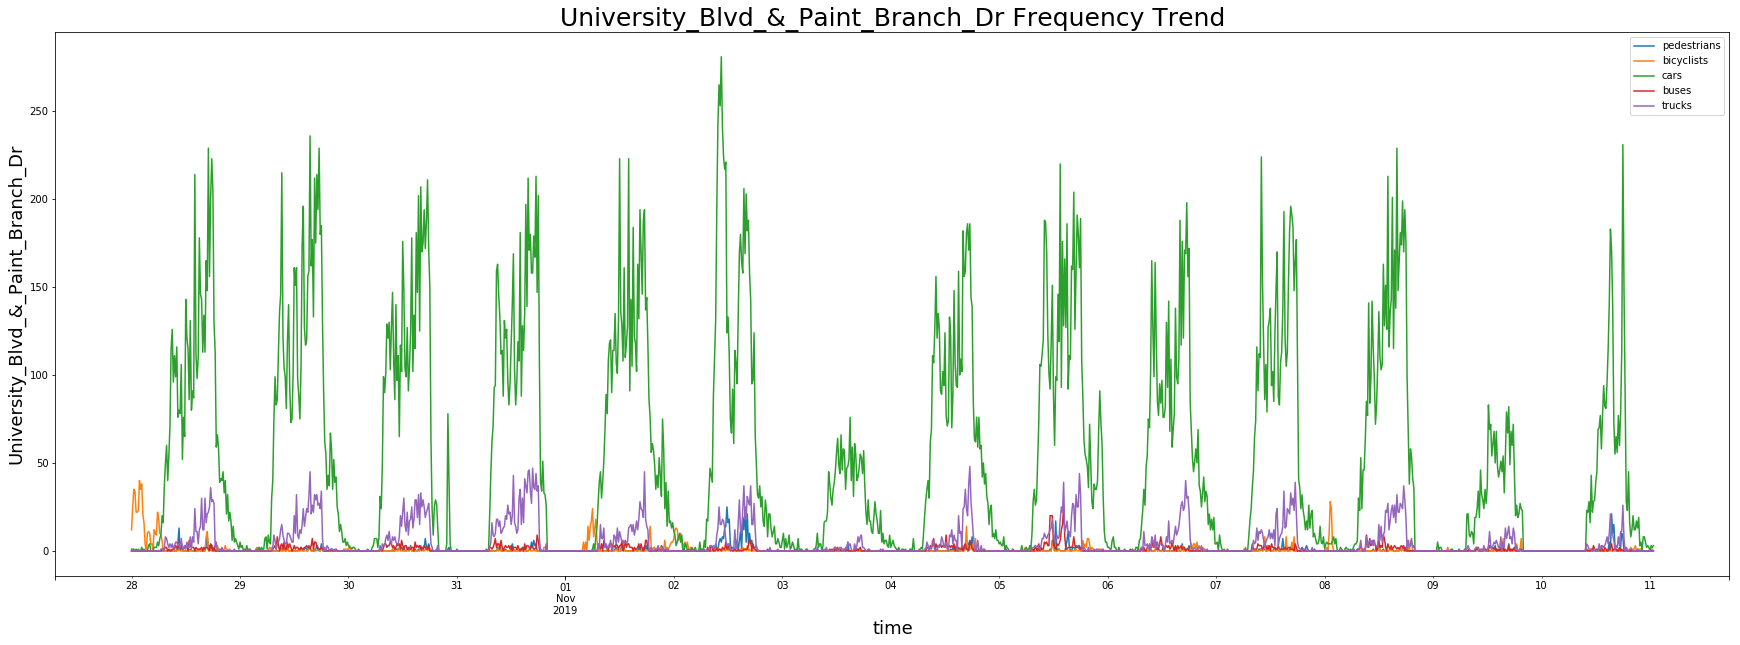

In [23]:
location_list = ['Stadium Drive & Regents Drive','Campus Drive & Paint Branch Drive',
                'Baltimore Avenue & Regents Drive (South Gate)','Campus_Dr_&_Presidential_Ave',
                 'University_Blvd_&_Paint_Branch_Dr']

for loc in location_list: 
    Dots_loc5[Dots_loc5['location_5']== loc].plot(kind = 'line', y = ['pedestrians','bicyclists','cars','buses','trucks'],
                                        x = 'time',figsize = (30,10))
    plt.xlabel('time', fontsize =18)
    plt.ylabel(loc,fontsize =18)
    plt.title(loc + ' Frequency Trend',fontsize =25, color = "k")
    #plt.savefig("figs/" + loc +".png",dpi=100) 
    plt.show()

<b>Foundings:</b> Stadium Drive & Regents Drive has the most pedestrians, can reach 2000 at peak.

## Activities

### 1.football game

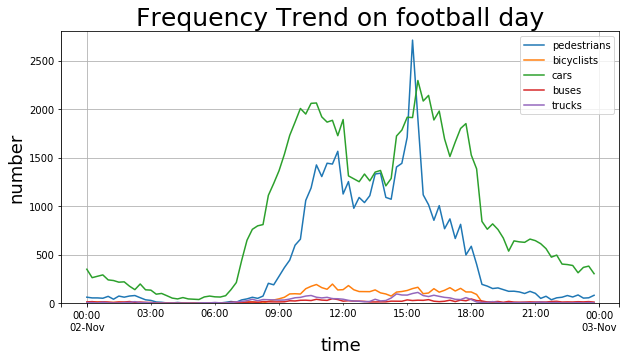

In [19]:
Dots_loc5[Dots_loc5['Date'] == '2019-11-02'].groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(kind = 'line', 
                                                                                                                                y = ['pedestrians','bicyclists','cars','buses','trucks']
                                                                                                                               ,figsize = (10,5))
plt.xlabel('time', fontsize =18)
plt.ylabel('number',fontsize =18)
plt.ylim((0,2800))
plt.title('Frequency Trend on football day',fontsize =25, color = "k")
plt.grid(True)

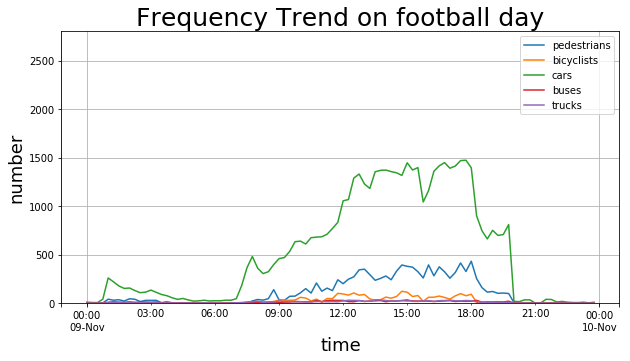

In [27]:
Dots_loc5[Dots_loc5['Date'] == '2019-11-09'].groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(kind = 'line', 
                                                                                                                                y = ['pedestrians','bicyclists','cars','buses','trucks']
                                                                                                                               ,figsize = (10,5))
plt.xlabel('time', fontsize =18)
plt.ylabel('number',fontsize =18)
plt.ylim((0,2800))
plt.title('Frequency Trend on football day',fontsize =25, color = "k")
plt.grid(True)

<b>Findings:</b> compare this two graph, we find (1)on game day, the num of cars and pedestrians went up more than non-game day a lot, and reached peak early(around 10am) also last to late night. (2)during the game time(from 11am to 3pm), the graph has a concave.

#### next, we look at the difference num between two days, which give us clearer sense

In [20]:
cols = ['pedestrians', 'bicyclists', 'cars', 'buses','trucks']
def find_diff(x):
    old = x.loc[x['Date']=="2019-11-02", cols].values
    new = x.loc[x['Date']=="2019-11-09", cols].values
    return pd.Series((old - new)[0], index = cols)
football_diff = Dots_loc5.groupby(["location_5","StartTime"]).apply(find_diff).reset_index()

In [21]:
football_diff.head(5)

,location_5,StartTime,pedestrians,bicyclists,cars,buses,trucks
0,Baltimore Avenue & Regents Drive (South Gate),00:00:00,47.0,0.0,189.0,5.0,1.5
1,Baltimore Avenue & Regents Drive (South Gate),00:15:00,40.5,0.0,140.0,12.5,3.5
2,Baltimore Avenue & Regents Drive (South Gate),00:30:00,36.0,0.0,157.0,7.5,0.5
3,Baltimore Avenue & Regents Drive (South Gate),00:45:00,37.5,0.0,158.5,9.0,7.5
4,Baltimore Avenue & Regents Drive (South Gate),01:00:00,34.5,0.5,-19.0,0.5,-1.0


In [30]:
football_diff.shape

(480, 7)

Text(0.5,1,'Differences between day with football day and without')

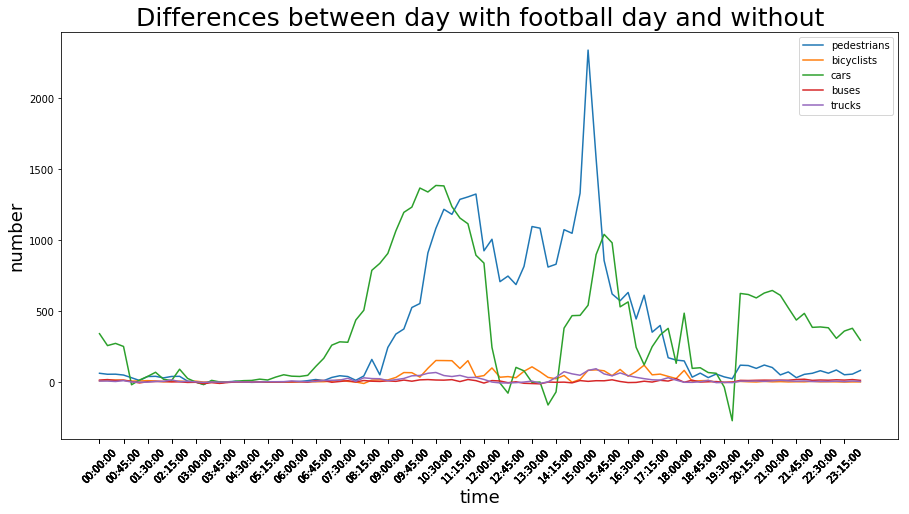

In [22]:
football_diff.groupby(['StartTime'],as_index=False)['pedestrians','bicyclists','cars','buses','trucks'].sum().plot(kind = 'line', y = ['pedestrians','bicyclists','cars','buses','trucks'],
                                       x = 'StartTime',figsize = (15,7.5))
plt.xlabel('time', fontsize =18)
plt.ylabel('number',fontsize =18)
plt.xticks(list(football_diff.StartTime)[::3], football_diff.StartTime[::3])
plt.xticks(rotation = 45)
plt.title('Differences between day with football day and without',fontsize =25, color = "k")

<b>findings:</b> (1)time trends of cars and pedestrians have very exactly the same patterns before the beginning of football game. And the steep rise of cars is 75mins ahead of pedestrians. (2)The number of pedestrians at the game day during the peak time(45mins around 3 pm) is around 2300 more than usual.

In [30]:
football_diff_c = football_diff.groupby(['StartTime'],as_index=False)['pedestrians','bicyclists','cars','buses','trucks'].sum()

In [34]:
x=football_diff_c.StartTime
pedes = football_diff_c.pedestrians
bus = football_diff_c.buses

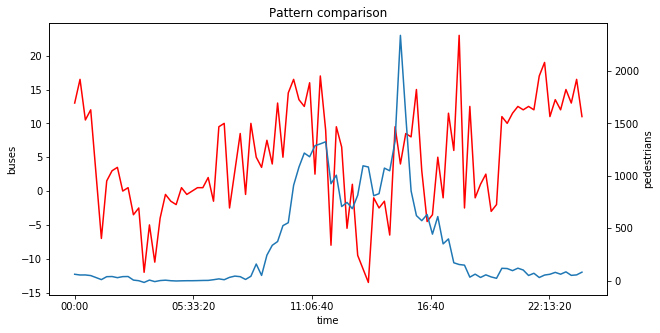

In [49]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(x, bus,'r')
ax1.set_ylabel('buses')
ax1.set_title("Pattern comparison")

ax2 = ax1.twinx()
ax2.plot(x, pedes)
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('pedestrians')
fig.set_size_inches(10, 5)



<b>

#### how game day affect difference traffic mode at difference location.

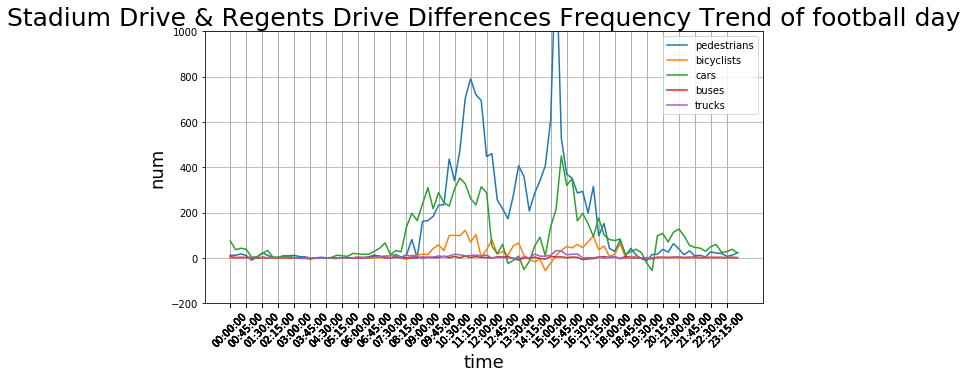

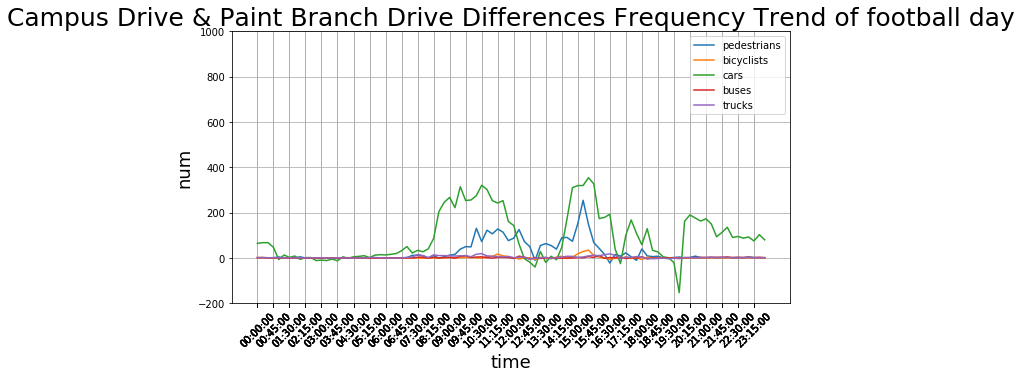

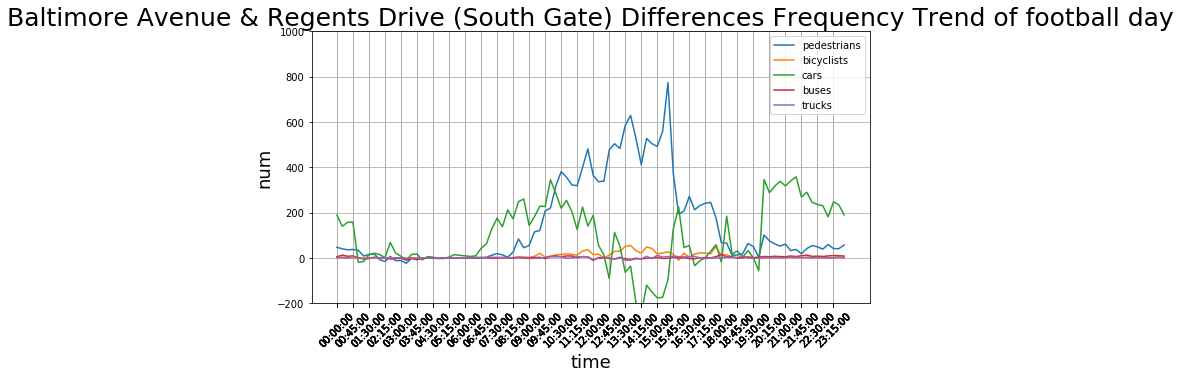

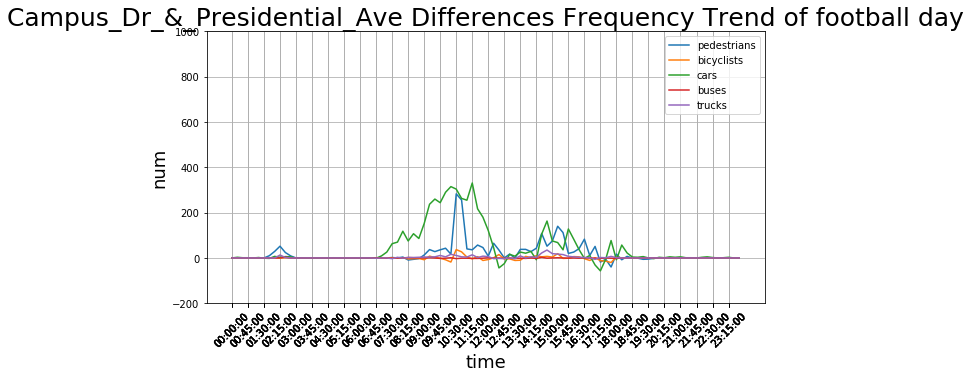

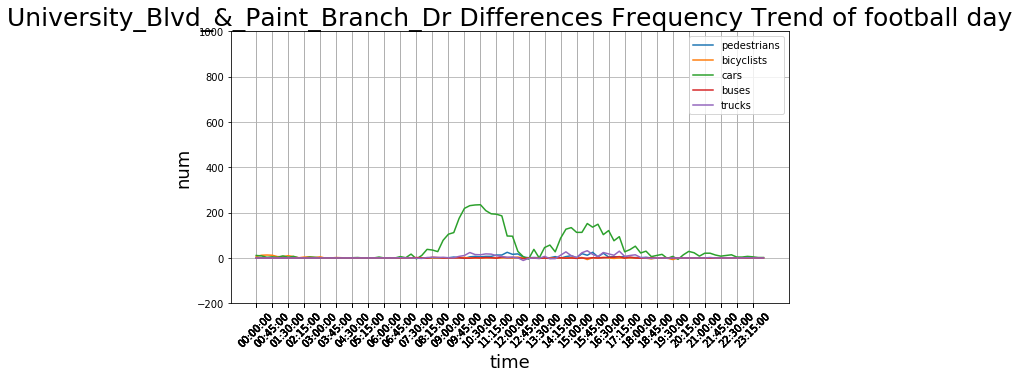

In [34]:
location_list = ['Stadium Drive & Regents Drive','Campus Drive & Paint Branch Drive',
                'Baltimore Avenue & Regents Drive (South Gate)','Campus_Dr_&_Presidential_Ave',
                 'University_Blvd_&_Paint_Branch_Dr']

for loc in location_list: 
    football_diff[football_diff['location_5']== loc].plot(kind = 'line', y = ['pedestrians','bicyclists','cars','buses','trucks'],
                                        x = 'StartTime',figsize = (10,5))
    plt.xlabel('time', fontsize =18)
    plt.ylabel('num',fontsize =18)
    plt.xticks(list(football_diff.StartTime)[::3], football_diff.StartTime[::3])
    plt.xticks(rotation = 45)
    plt.ylim((-200,1000))
    plt.grid(True)
    plt.title(loc + ' Differences Frequency Trend of football day',fontsize =25, color = "k")
    #plt.savefig("figs/" + loc +".png",dpi=100) 
    plt.show()

<b>Findings:</b> 
<li>(1)Different from others, the num of pedestrians at Baltimore Avenue & Regents Drive (South Gate) increases a lot during game time, and reach the peak at the end of the game. The reason is many people watch game at bars in baltimore avenue. And num of cars is much less than usual.(why? might because of potential traffic)</li>
<li>(2)the difference of pedestrians at Stadium Drive & Regents Drive reach peak at 3pm (1200 more than usual). Regent garage is one of the game day garage</li> 
<li>(3)after the end of game(around 3pm), more car exit campus from Campus Drive & Paint Branch Drive rather than south gate,the second is University_Blvd_&_Paint_Branch_Dr. Campus Drive & Paint Branch Drive has higher kurtosis than University_Blvd_&_Paint_Branch_Dr.</li>
<li>(4)at 7:50pm, traffic are much less for the first three location, and then rise up at 8pm, why???</li>
<li>(5)at University_Blvd_&_Paint_Branch_Dr, before the beginning of game, car traffic was higher than usual, might because they couldn't find parking spot, then went out and park along the road??? suggestion: lead parking to reduce traffic on campus.

### 2. mens' basketball  11/5 7:30-10:30pm Xfinity

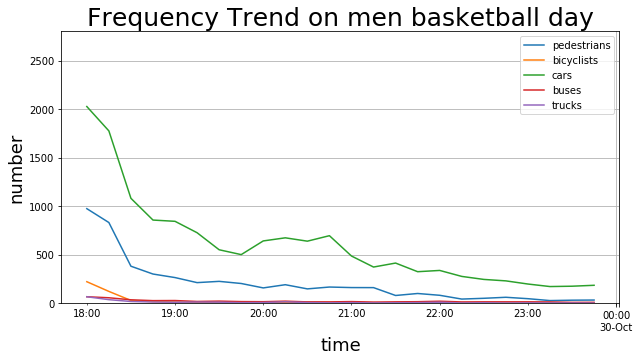

In [17]:
Dots_loc5[(Dots_loc5['Date'] == '2019-10-29') & (Dots_loc5['StartTime']>=Dots_loc5['StartTime'][13452])].groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(kind = 'line', 
                                                                                                                                y = ['pedestrians','bicyclists','cars','buses','trucks']
                                                                                                                               ,figsize = (10,5))
plt.xlabel('time', fontsize =18)
plt.ylabel('number',fontsize =18)
plt.ylim((0,2800))
plt.title('Frequency Trend on men basketball day',fontsize =25, color = "k")
plt.grid(True)

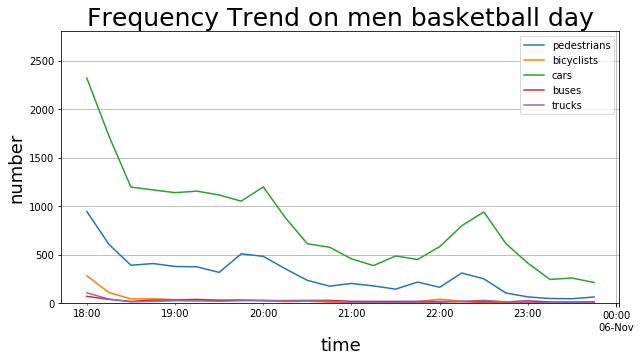

In [18]:
# men's basketball Location: Xfinity
Dots_loc5[(Dots_loc5['Date'] == '2019-11-5')& (Dots_loc5['StartTime']>=Dots_loc5['StartTime'][13452])].groupby(['time'])[['pedestrians','bicyclists','cars','buses','trucks']].sum().plot(kind = 'line', 
                                                                                                                                y = ['pedestrians','bicyclists','cars','buses','trucks']
                                                                                                                               ,figsize = (10,5))
plt.xlabel('time', fontsize =18)
plt.ylabel('number',fontsize =18)
plt.ylim((0,2800))
plt.title('Frequency Trend on men basketball day',fontsize =25, color = "k")
plt.grid(True)

#### now, calculate difference

In [21]:
cols = ['pedestrians', 'bicyclists', 'cars', 'buses','trucks']
def find_diff2(x):
    happen = x.loc[x['Date']=="2019-11-05", cols].values
    non_happen = x.loc[x['Date']=="2019-10-29", cols].values
    return pd.Series((happen - non_happen)[0], index = cols)
menbasket_diff = Dots_loc5[Dots_loc5['StartTime']>=Dots_loc5['StartTime'][13452]].groupby(["location_5","StartTime"]).apply(find_diff2).reset_index()

In [22]:
menbasket_diff.head(5)

,location_5,StartTime,pedestrians,bicyclists,cars,buses,trucks
0,Baltimore Avenue & Regents Drive (South Gate),18:00:00,-55.5,-1.0,72.5,-11.0,9.5
1,Baltimore Avenue & Regents Drive (South Gate),18:15:00,-190.5,-16.0,-97.5,-5.5,-3.0
2,Baltimore Avenue & Regents Drive (South Gate),18:30:00,5.5,-14.0,-72.5,-5.5,-1.5
3,Baltimore Avenue & Regents Drive (South Gate),18:45:00,2.0,7.0,56.5,-4.0,0.5
4,Baltimore Avenue & Regents Drive (South Gate),19:00:00,39.5,1.0,-16.0,-5.0,-0.5


Text(0.5,1,'Differences Frequency Trend of men basketball day')

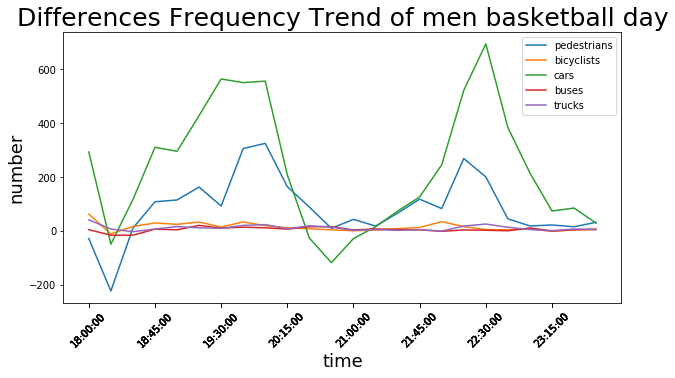

In [27]:

#plt.subplot(211)
menbasket_diff.groupby(['StartTime'],as_index=False)['pedestrians','bicyclists','cars','buses','trucks'].sum().plot(kind = 'line', y = ['pedestrians','bicyclists','cars','buses','trucks'],
                                       x = 'StartTime',figsize = (10,5))
plt.xlabel('time', fontsize =18)
plt.ylabel('number',fontsize =18)
plt.xticks(list(menbasket_diff.StartTime)[::3], menbasket_diff.StartTime[::3])
plt.xticks(rotation = 45)
plt.title('Differences Frequency Trend of men basketball day',fontsize =25, color = "k")

#plt.subplot(212)

Text(0.5,1,'Differences Frequency Trend of men basketball day')

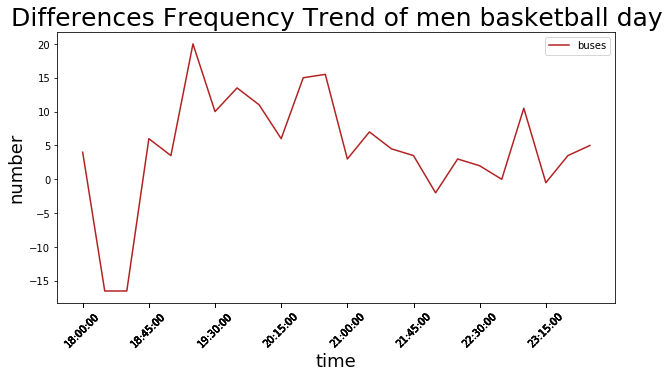

In [30]:
menbasket_diff.groupby(['StartTime'],as_index=False)['pedestrians','bicyclists','cars','buses','trucks'].sum().plot(kind = 'line', y = 'buses',
                                       x = 'StartTime',figsize = (10,5), color = 'firebrick')
plt.xlabel('time', fontsize =18)
plt.ylabel('number',fontsize =18)
plt.xticks(list(menbasket_diff.StartTime)[::3], menbasket_diff.StartTime[::3])
plt.xticks(rotation = 45)
plt.title('Differences Frequency Trend of men basketball day',fontsize =25, color = "k")



concave showed up during the game time(7:30-10：30pm). won't cause heavy traffic